# [Chapter 5](https://github.com/Ziaeemehr/spikes/blob/main/docs/examples/chap_05.ipynb)

#### **Approximation and simulation**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/spikes/blob/main/docs/examples/chap_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uncomment and run this line to install the package on colab
# !pip install "git+https://github.com/Ziaeemehr/spikes.git" -q

In [1]:
import sympy
import sympy as sp
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
from IPython.display import display, Math
from spikes.solver import solve_system_of_equations

sympy.init_printing()


\begin{align*}
\frac{dx}{dt} &= 2y \\ 
\frac{dy}{dt} &= -2x
\end{align*}

$x(0)=2, y(0)=0, h=0.1, 0.01, T=1$

$$
\frac{d}{dt}
\begin{pmatrix}
x \\
y 
\end{pmatrix} =
\begin{pmatrix}
0 & -2 \\
-2& 0 
\end{pmatrix} 
\begin{pmatrix}
x \\
y
\end{pmatrix}
$$

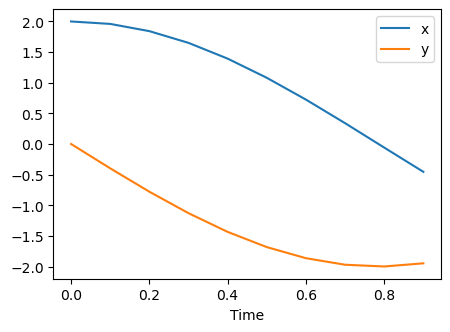

In [2]:
# solving analytically and numerically using odeint:
A = np.array([[0,2],[-2,0]])
B = np.array([0,0])
X0 = np.array([2,0])
trange1 = np.arange(0, 1, 0.1)
trange2 = np.arange(0, 1, 0.01)
Sol, xvalues1 = solve_system_of_equations(A, B, X0, trange1)

plt.figure(figsize=(5,3.5))

plt.plot(trange1, xvalues1[0], label="x")
plt.plot(trange1, xvalues1[1], label="y")
plt.legend();
plt.xlabel('Time')
plt.legend();

Sol

### Exercise 2, Solving with Euler method

In [3]:
def system(t, x0):
    
    dxdt = -2 * x0[1]
    dydt = -2 * x0[0]
    return np.array([dxdt, dydt])

def integrate_euler(ti, tf, function, h, x0):
    x = np.zeros((2, int((tf - ti) / h) + 1))
    x[:, 0] = x0
    t = np.linspace(ti, tf, int((tf - ti) / h) + 1)

    for i in range(1, x.shape[1]):
        x[:, i] = x[:, i-1] + h * function(ti + h * i, x[:, i-1])

    return t, x


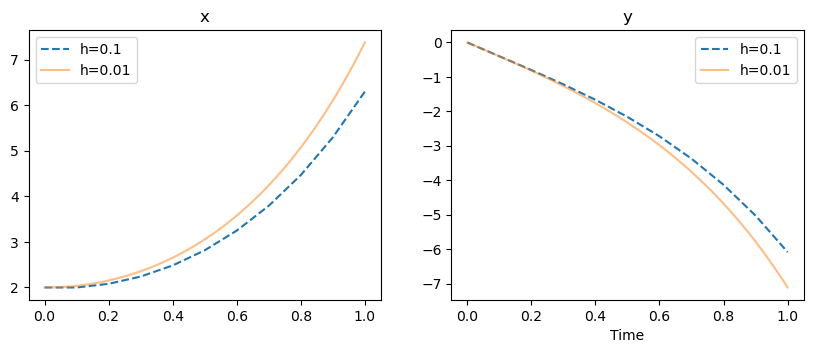

In [4]:
t1, x1 = integrate_euler(0,1, system, 0.1, X0)
t2, x2 = integrate_euler(0,1, system, 0.01, X0)

plt.figure(figsize=(10,3.5))
plt.subplot(1,2, 1)

plt.plot(t1, x1[0], label="h=0.1", ls="--")
plt.plot(t2, x2[0], label="h=0.01", alpha=.5)
plt.title("x")
plt.legend();

plt.subplot(1,2,2)
plt.plot(t1, x1[1], label="h=0.1", ls="--")
plt.plot(t2, x2[1], label="h=0.01", alpha=.5)
plt.title("y")

plt.xlabel('Time')
plt.legend();

### Exercise 1.

$$
\begin{align*}
\frac{dR}{dt} &= \frac{1}{0.02}(-R + S(P)) \\ 
S(P) &= \begin{cases}
\frac{100P^2}{25 + P^2} & \text{for } P \geq 0 \\
0 & \text{for } P < 0
\end{cases} \\
P(t) &= 20\sin(2\pi10t)
\end{align*}
$$


where $R(0)=0, T=1, h=0.004$.

In [5]:
def P(t):
    return 20 * np.sin(2 * np.pi * 10 * t)

def S(p):
    return (100 * p**2) / (25 + p**2) if p >= 0 else 0

def system(t, x0):
    dRdt = -1/0.02 * (x0 + S(P(t)))
    return dRdt

def integrate_rk4(ti, tf, function, h, x0):
    x = np.zeros((len(x0), int((tf - ti) / h) + 1))
    x[:, 0] = x0
    t = np.linspace(ti, tf, int((tf - ti) / h) + 1)

    for i in range(1, x.shape[1]):
        k1 = h * function(t[i-1], x[:, i-1])
        k2 = h * function(t[i-1] + 0.5 * h, x[:, i-1] + 0.5 * k1)
        k3 = h * function(t[i-1] + 0.5 * h, x[:, i-1] + 0.5 * k2)
        k4 = h * function(t[i-1] + h, x[:, i-1] + k3)
        x[:, i] = x[:,i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return t, x 

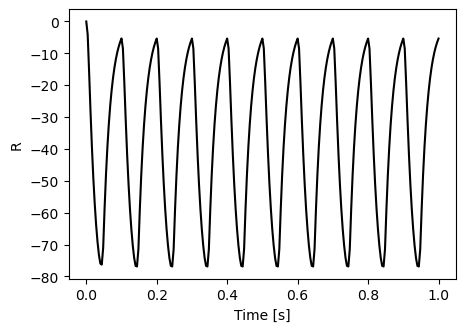

In [6]:
t, R = integrate_rk4(0,1, system, 0.004, [0])


t.shape, R.shape
plt.figure(figsize=(5,3.5))

plt.plot(t, R[0], c='k');
plt.xlabel('Time [s]')
plt.ylabel("R");